**DIABETES**

In [ ]:
!pip install -U pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8d53883e575f21bc9734c5e251a21fb8e8167842f05563a3e81a8c111c97d901
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstal

In [ ]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import io
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Importar a biblioteca numpy
import numpy as np

# Our package
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# transforming the csv into a pandas data frame
diabetes = pd.read_csv('/content/drive/MyDrive/Notebooks/diabetes.csv')

diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# Generate the Profiling Report
profile = ProfileReport(diabetes, title="Diabetes Dataset", html={"style": {"full_width": True}}, sort=None)

In [ ]:
# Just to get a sense of the data
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Substitui os zeros pela média de cada feature

# Substituir zeros pelas médias nas colunas específicas
cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace_zeros:
    # Calcular a média da coluna excluindo os zeros
    mean_value = diabetes[diabetes[col] != 0][col].mean()

    # Substituir os zeros pela média
    diabetes[col] = diabetes[col].replace(0, mean_value)


In [ ]:
# Supondo que 'diabetes' é o seu DataFrame
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Encontrar os valores mínimos, máximos e médios nas colunas específicas
min_values = diabetes[cols_to_check].min()
max_values = diabetes[cols_to_check].max()
mean_values = diabetes[cols_to_check].mean()

# Criar um DataFrame com os resultados
summary_table = pd.DataFrame({
    'Feature': cols_to_check,
    'Mínimo': min_values,
    'Máximo': max_values,
    'Média': mean_values.round(2)
})

# Exibir a tabela
print(summary_table)



                     Feature  Mínimo  Máximo   Média
Glucose              Glucose    44.0   199.0  121.69
BloodPressure  BloodPressure    24.0   122.0   72.41
SkinThickness  SkinThickness     7.0    99.0   29.15
Insulin              Insulin    14.0   846.0  155.55
BMI                      BMI    18.2    67.1   32.46


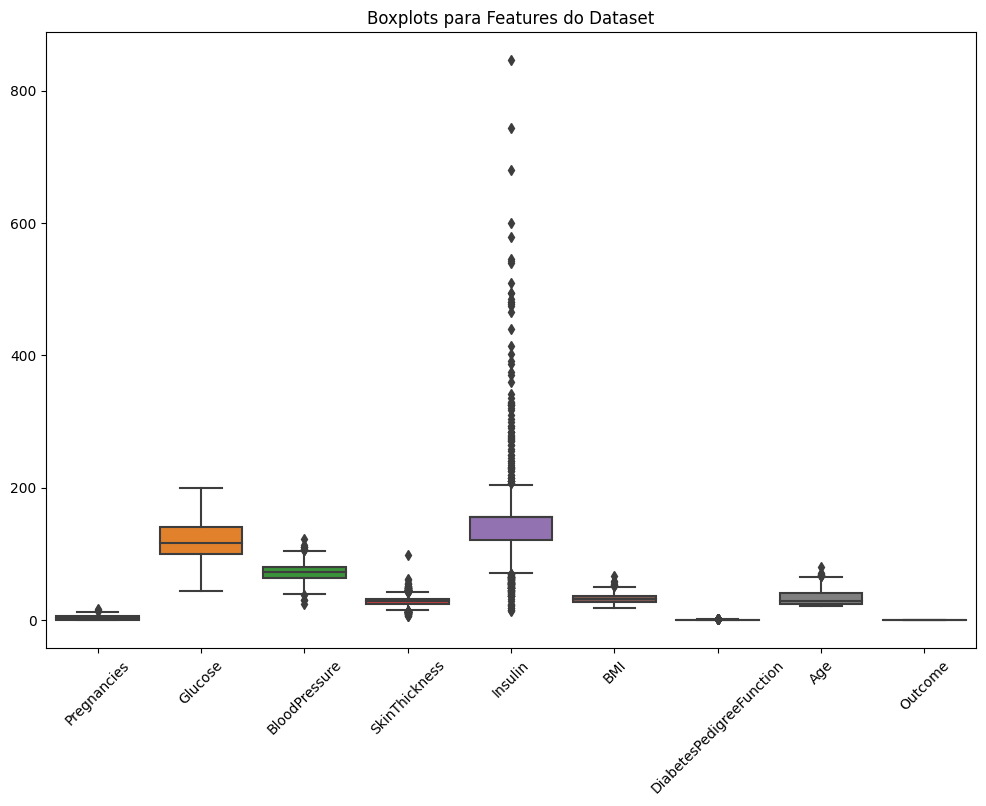

In [ ]:
# Supondo que 'diabetes' é o seu DataFrame
# Selecionar apenas as colunas numéricas (features)
numeric_features = diabetes.select_dtypes(include=['float64', 'int64'])

# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar um boxplot para cada feature
sns.boxplot(data=numeric_features)

# Adicionar rótulos e título
plt.title('Boxplots para Features do Dataset')
plt.xticks(rotation=45)  # Rotacionar rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.show()


*Exercício 1*

1 – Train a Logistic Regression model

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'diabetes' with your features and target variable
# For example, 'Outcome' is the target variable indicating diabetes (1) or not (0)

# Handle missing values and convert to numeric
diabetes = diabetes.dropna().apply(pd.to_numeric, errors='coerce')

# Selecting features (X) and target variable (y)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.75
Confusion Matrix:
[[82 17]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
import pickle

# Save the model to a file
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)

# To load the model from the file
with open('logreg_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


**Discution:**

**Accuracy: 0.75**

The accuracy is a measure of how well the model correctly predicted both classes (0 and 1) in the test set. In this case, the model achieved an accuracy of 75%, indicating that it correctly classified 75% of the instances in the test set.

**Confusion Matrix:**

The confusion matrix provides a more detailed breakdown of the model's predictions:
True Positive (TP): 34 instances were correctly predicted as class 1.
True Negative (TN): 82 instances were correctly predicted as class 0.
False Positive (FP): 17 instances were incorrectly predicted as class 1.
False Negative (FN): 21 instances were incorrectly predicted as class 0.

**Classification Report:**

Precision (Precisão): A precisão é a proporção de instâncias positivas corretamente previstas em relação ao total de instâncias previstas como positivas. Para a classe 0, é 0.80, e para a classe 1, é 0.67.
Recall (Sensibilidade): O recall é a proporção de instâncias positivas corretamente previstas em relação ao total de instâncias positivas. Para a classe 0, é 0.83, e para a classe 1, é 0.62.
F1-Score: O F1-score é a média harmônica de precisão e recall. Para a classe 0, é 0.81, e para a classe 1, é 0.64.
Support: O número real de instâncias para cada classe no conjunto de teste.

**Macro e Weighted Avg:**

Macro avg é a média não ponderada das métricas para cada classe.
Weighted avg é a média ponderada das métricas para cada classe, com base no suporte (número de instâncias).

*2- Model Evaluation*

   •	Confusion matrix

   •	Classification report

   •	ROC curve and AUC


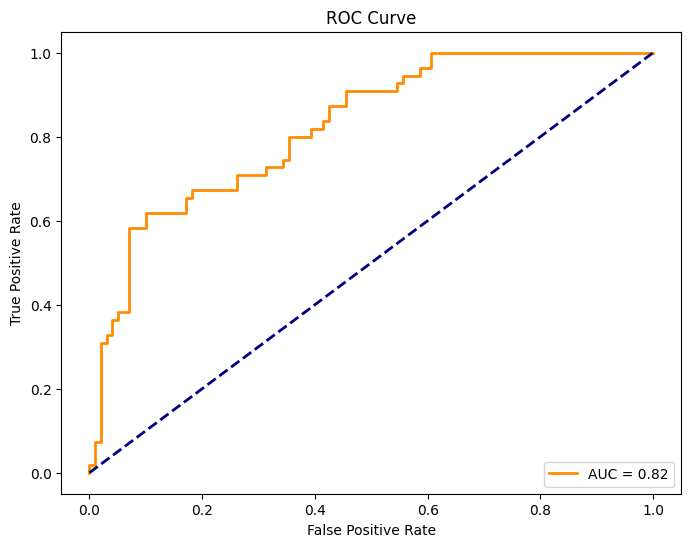

AUC: 0.82


In [ ]:
# Assuming you have already trained the model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_prob = logreg_model.predict_proba(X_test_scaled)

# Extract probabilities for positive class only
y_prob_positive = y_prob[:, 1]

# Now you can use y_prob_positive in the roc_curve and auc functions
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')



*3 – Train a DNN model*

•	Output (1, activation=sigmoid)

•	Optimizer=adam, loss= binary_crossentropy, metrics=accuracy


In [ ]:
#Preprocessing
norm_layer=tf.keras.layers.Normalization()
norm_layer.adapt(X_train)

In [ ]:
norm_layer.mean

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[  3.7426708 , 121.84597   ,  72.24548   ,  28.7557    ,
        154.90552   ,  32.353424  ,   0.46916777,  32.907166  ]],
      dtype=float32)>

Epoch 1/150
50/50 - 2s - loss: 0.7119 - accuracy: 0.4582 - val_loss: 0.6920 - val_accuracy: 0.5285 - 2s/epoch - 32ms/step
Epoch 2/150
50/50 - 0s - loss: 0.6794 - accuracy: 0.6130 - val_loss: 0.6696 - val_accuracy: 0.6179 - 206ms/epoch - 4ms/step
Epoch 3/150
50/50 - 0s - loss: 0.6514 - accuracy: 0.6456 - val_loss: 0.6467 - val_accuracy: 0.6179 - 176ms/epoch - 4ms/step
Epoch 4/150
50/50 - 0s - loss: 0.6312 - accuracy: 0.6578 - val_loss: 0.6220 - val_accuracy: 0.6179 - 147ms/epoch - 3ms/step
Epoch 5/150
50/50 - 0s - loss: 0.6107 - accuracy: 0.6843 - val_loss: 0.5977 - val_accuracy: 0.6098 - 196ms/epoch - 4ms/step
Epoch 6/150
50/50 - 0s - loss: 0.5922 - accuracy: 0.6721 - val_loss: 0.5790 - val_accuracy: 0.6098 - 163ms/epoch - 3ms/step
Epoch 7/150
50/50 - 0s - loss: 0.5767 - accuracy: 0.6925 - val_loss: 0.5585 - val_accuracy: 0.6260 - 198ms/epoch - 4ms/step
Epoch 8/150
50/50 - 0s - loss: 0.5494 - accuracy: 0.7026 - val_loss: 0.5422 - val_accuracy: 0.6667 - 197ms/epoch - 4ms/step
Epoch 9/15

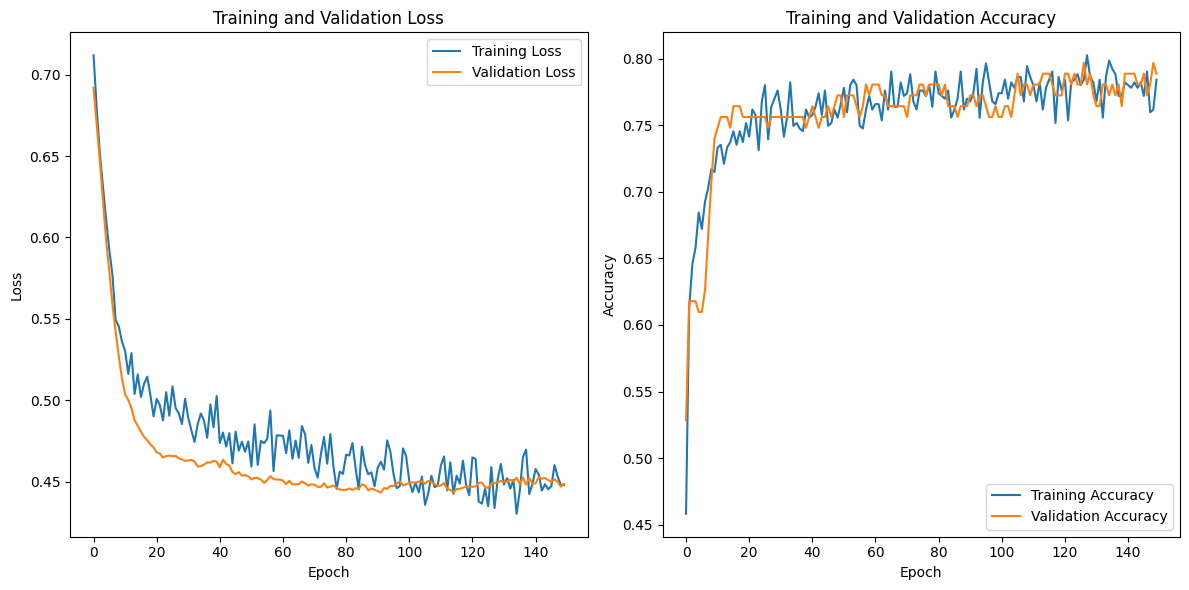

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

# Assuming you have a DataFrame 'diabetes' with your features and target variable
# For example, 'Outcome' is the target variable indicating diabetes (1) or not (0)

# Selecting features (X) and target variable (y)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the DNN model
model = Sequential()
#model.add(Normalization(input_shape=(X_train_scaled.shape[1],)))
tf.keras.layers.InputLayer(input_shape=(8,)),
norm_layer,
model.add(Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5)) # para evitar overfitting
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=10, validation_split=0.2, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

*4 - Model Evaluation*

•	Confusion matrix

•	Classification report

•	ROC curve and AUC

•	Train and test loss and accuracy
